 ## Customer Spending Behaviour Analysis for Segmentation 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Understanding the data types

In [ ]:
df = pd.read_csv('./dataset/customer_segmentation.csv')
print("Data Shape: ",df.shape)
df.head()

Data Shape:  (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Filling the missing column values

In [70]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [71]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [72]:
df["Income"].fillna(df["Income"].mean(),inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Basic Data Exploration

In [73]:
df.duplicated().sum()
df['ID'].duplicated().sum()

np.int64(0)

In [74]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [75]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [77]:
df['Age'] = (2025 - df['Year_Birth']).clip(upper=90)
df['Age'].describe()

count    2240.000000
mean       56.143750
std        11.759647
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        90.000000
Name: Age, dtype: float64

In [78]:
df.sort_values(by='Income',ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,48
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,0,3,11,0,49
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,3,11,0,43
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,0,3,11,0,54
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,3,11,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,0,0,0,0,0,3,11,0,56
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,0,0,0,0,0,0,3,11,0,62
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,0,0,0,0,0,3,11,0,52
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,0,0,0,0,0,3,11,0,46


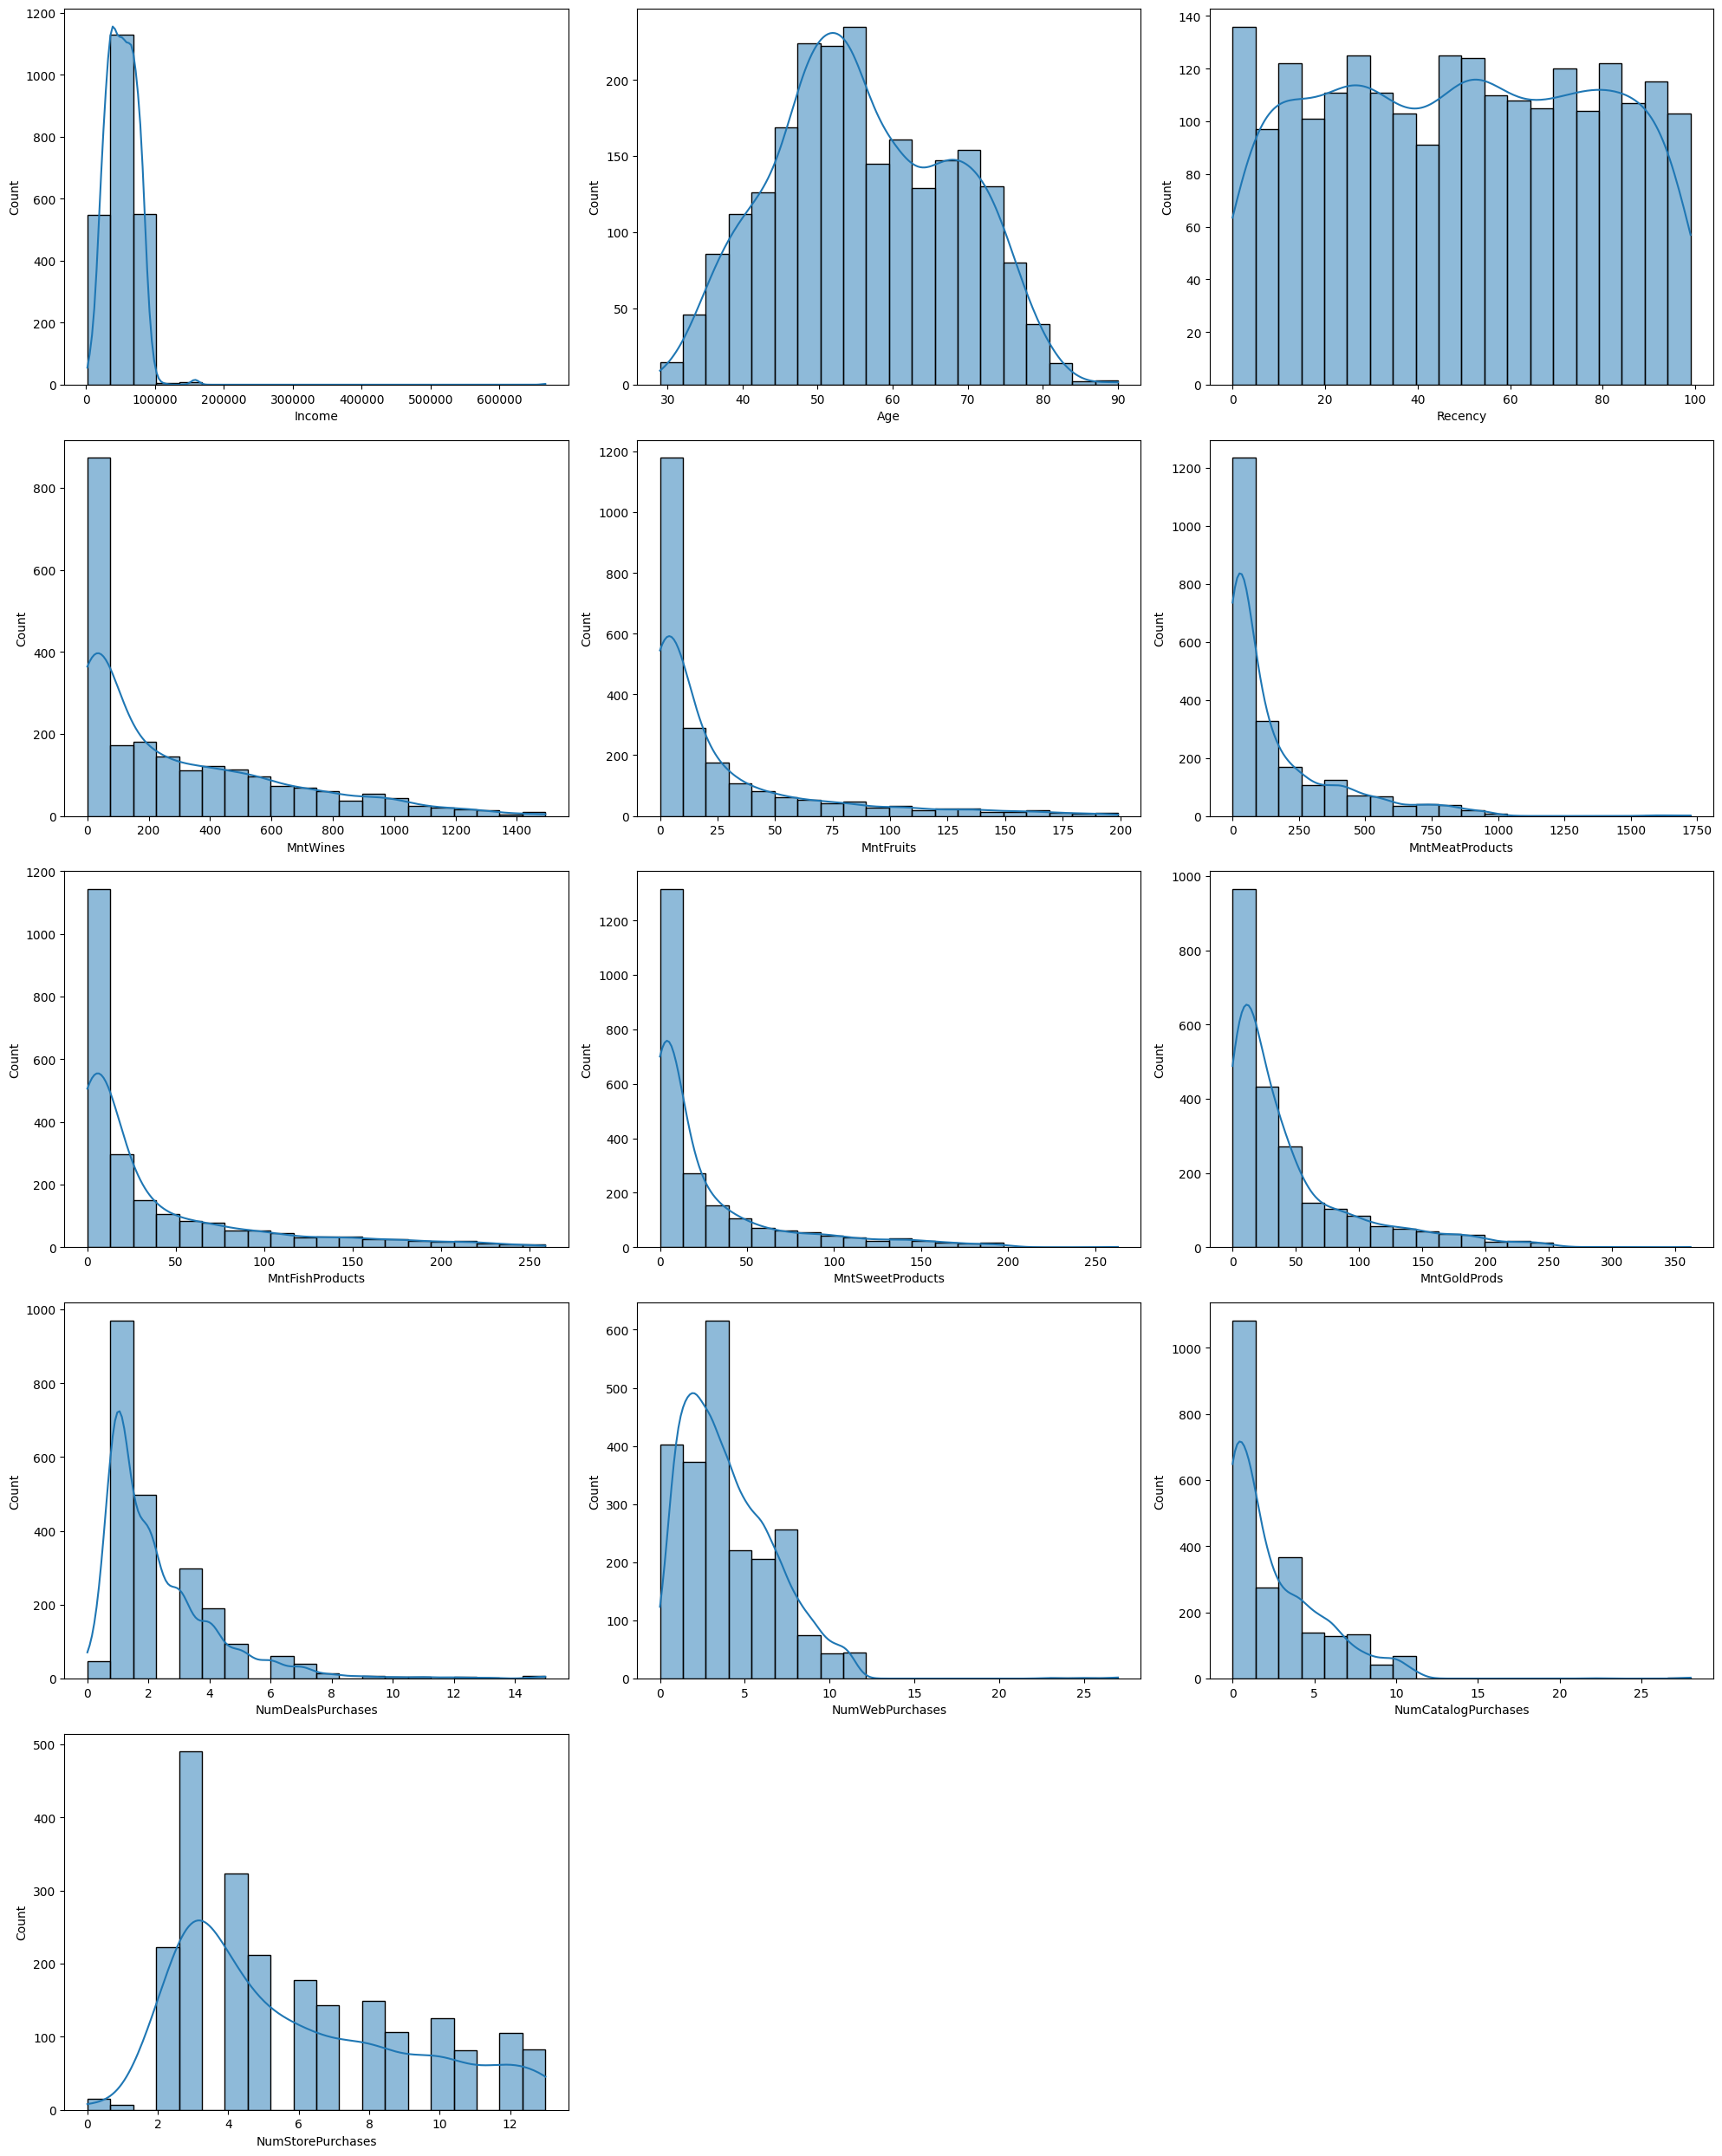

In [79]:
cols = ['Income','Age','Recency', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
fig, axes = plt.subplots(5, 3, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

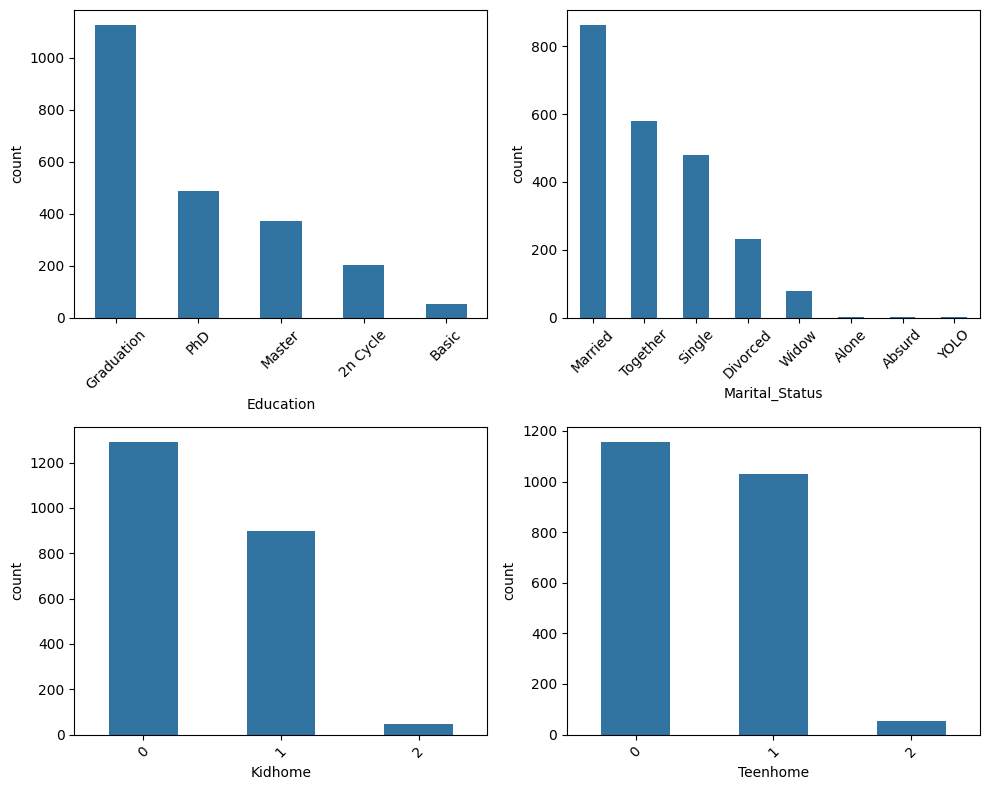

In [80]:
count_cols = ['Education','Marital_Status','Kidhome','Teenhome']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(count_cols):
    sns.countplot(x=col, data=df, ax=axes[i],width=.5, order=df[col].value_counts().index)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [81]:
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,41,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,44,1


In [82]:
mnt_cols = [col for col in df.columns if col.startswith('Mnt')]
df['TotalSpend'] = df[mnt_cols].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalSpend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,1,422


In [83]:
df['TotalPurchases'] = df['NumWebPurchases']  + df['NumStorePurchases']+ df['NumCatalogPurchases']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalSpend,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,0,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,2,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,1,53,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,1,422,14


In [84]:
accepted_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

df['TotalAccepted'] = df[accepted_cols].sum(axis=1)

df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalSpend,TotalPurchases,TotalAccepted
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,71,2,27,4,0
884,5830,1972,PhD,Single,86857.0,0,0,2012-09-12,96,899,...,0,0,3,11,1,53,0,2114,21,0
1120,850,1968,Graduation,Single,70566.0,0,1,2013-10-06,4,381,...,0,0,3,11,0,57,1,757,20,0
1788,1513,1979,2n Cycle,Together,60839.0,1,1,2012-08-28,72,600,...,0,0,3,11,0,46,2,1250,16,0
718,10159,1970,Graduation,Divorced,58710.0,0,1,2013-03-31,77,440,...,0,0,3,11,0,55,1,1185,25,0


In [85]:
today = pd.Timestamp.today()

df['CustomerTenure'] = ((today - df['Dt_Customer']).dt.days/365).round(2)

### Spending Analysis

In [86]:
mnt_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

product_stats = df[mnt_cols].agg(['mean','median']).T
product_stats.sort_values('mean', ascending=False)


,mean,median
MntWines,303.935714,173.5
MntMeatProducts,166.950000,67.0
MntGoldProds,44.021875,24.0
MntFishProducts,37.525446,12.0
MntSweetProducts,27.062946,8.0
MntFruits,26.302232,8.0


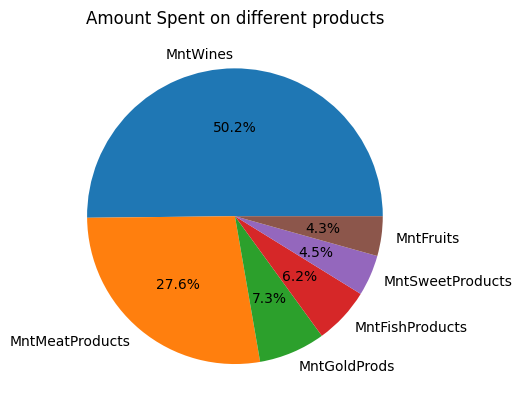

In [87]:
product_contribution = ((df[mnt_cols].sum() / df['TotalSpend'].sum()) * 100).round(2)

product_contribution.sort_values(ascending=False,inplace=True)

plt.pie(product_contribution,labels=product_contribution.index,autopct='%1.1f%%')
plt.title("Amount Spent on different products")
plt.show()

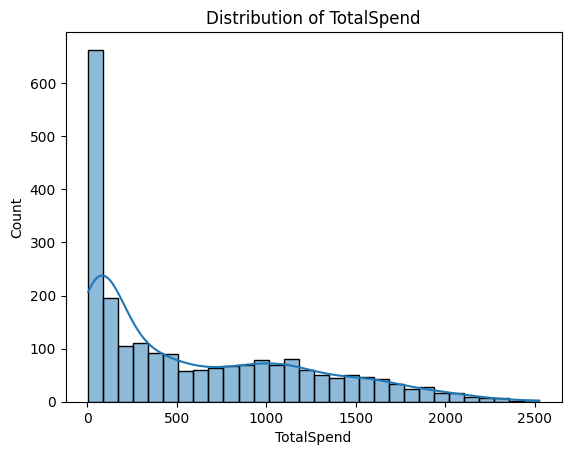

In [88]:
sns.histplot(df['TotalSpend'], bins=30, kde=True)
plt.title("Distribution of TotalSpend")
plt.show()

In [89]:
top_10 = df['TotalSpend'].quantile(0.90)
bottom_50 = df['TotalSpend'].quantile(0.50)

top_10_revenue = df.loc[df['TotalSpend'] >= top_10, 'TotalSpend'].sum()
bottom_50_revenue = df.loc[df['TotalSpend'] <= bottom_50, 'TotalSpend'].sum()

print(f"{(top_10_revenue / df['TotalSpend'].sum()*100).round(2)}% revenue is generated by top 10% customers")


30.16% revenue is generated by top 10% customers


### Channel Purchace Analysis


In [90]:
channel_cols = ['NumWebPurchases','NumStorePurchases','NumCatalogPurchases']

df[channel_cols].mean()


NumWebPurchases        4.084821
NumStorePurchases      5.790179
NumCatalogPurchases    2.662054
dtype: float64

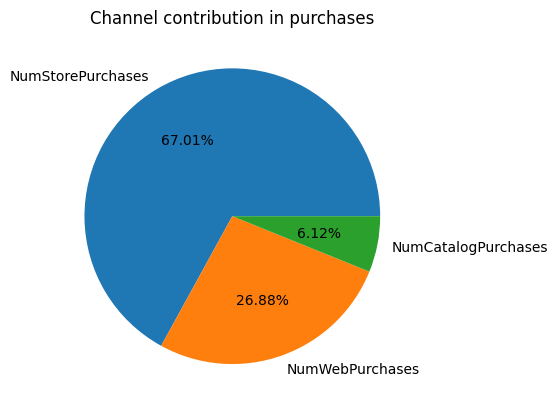

In [91]:
df['DominantChannel'] = df[channel_cols].idxmax(axis=1)
channel_contribution = df['DominantChannel'].value_counts(normalize=True)
plt.pie(channel_contribution,labels=channel_contribution.index,autopct='%1.2f%%')
plt.title('Channel contribution in purchases')
plt.show()

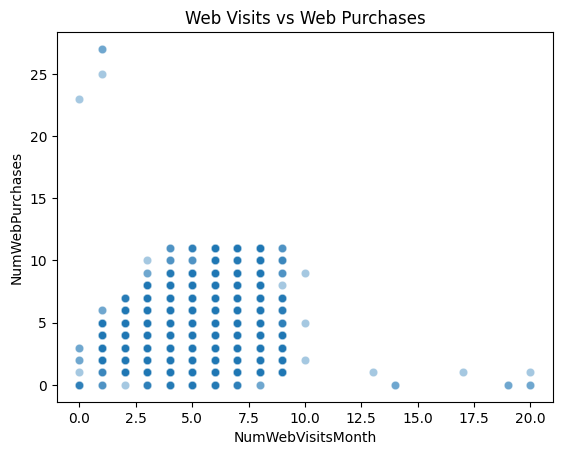

In [92]:
sns.scatterplot(x='NumWebVisitsMonth',y='NumWebPurchases',data=df,alpha=0.4)
plt.title("Web Visits vs Web Purchases")
plt.show()


In [93]:
df.groupby('DominantChannel')['TotalSpend'].mean().sort_values(ascending=False)

DominantChannel
NumCatalogPurchases    1344.386861
NumStorePurchases       563.065290
NumWebPurchases         544.262458
Name: TotalSpend, dtype: float64

### Campaign Analysis


In [94]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

campaign_summary = []

for col in campaign_cols:
    campaign_summary.append({
        'Campaign': col,
        'AcceptanceRate': df[col].mean(),
        'AvgSpend_Accep': df.loc[df[col]==1,'TotalSpend'].mean(),
        'AvgSpend_NotAccep': df.loc[df[col]==0,'TotalSpend'].mean()
    })

pd.DataFrame(campaign_summary)


,Campaign,AcceptanceRate,AvgSpend_Accep,AvgSpend_NotAccep
0,AcceptedCmp1,0.064286,1482.222222,545.585878
1,AcceptedCmp2,0.013393,1307.666667,596.270588
2,AcceptedCmp3,0.072768,720.539877,596.793452
3,AcceptedCmp4,0.074554,1143.125749,562.511336
4,AcceptedCmp5,0.072768,1616.110429,526.510351


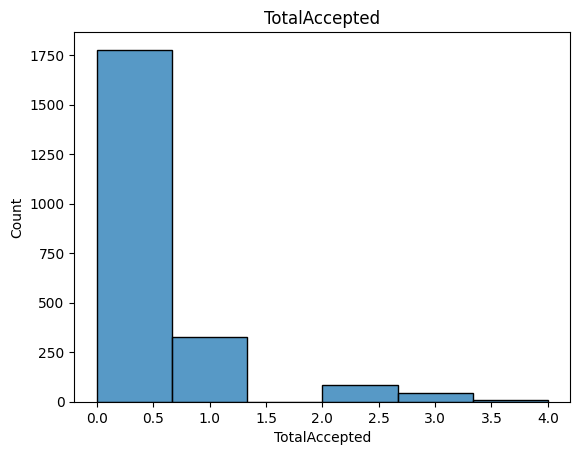

In [95]:
sns.histplot(df['TotalAccepted'], bins=6)
plt.title("TotalAccepted")
plt.show()


In [96]:
df.groupby('TotalAccepted')[['Income','TotalSpend','Recency']].mean()

,Income,TotalSpend,Recency
TotalAccepted,,,
0,48887.192474,477.805290,49.340461
1,59478.060008,921.520000,48.243077
2,75178.969912,1408.048193,46.710843
3,82877.272727,1705.636364,52.590909
4,85861.636364,1501.636364,41.545455


In [97]:
response_comparison = df.groupby('Response')[['Income','TotalSpend','Recency','TotalPurchases','TotalChildren']].mean()
response_comparison


,Income,TotalSpend,Recency,TotalPurchases,TotalChildren
Response,,,,,
0,50856.124754,538.929171,51.514690,12.040399,1.003673
1,60185.836082,987.392216,35.383234,15.371257,0.646707


In [98]:
df['HasChildren'] = (df['TotalChildren'] > 0).astype(int)
df.groupby('HasChildren')[['TotalSpend','TotalPurchases','TotalAccepted']].mean()

,TotalSpend,TotalPurchases,TotalAccepted
HasChildren,,,
0,1106.029781,16.416928,0.600313
1,406.579900,10.991885,0.177278


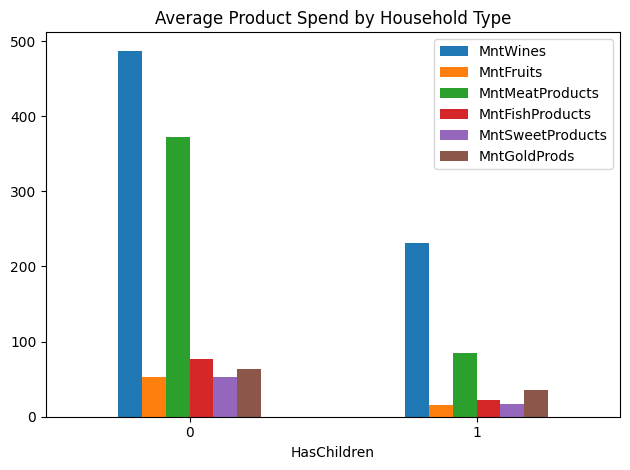

In [99]:
spend_vs_children = df.groupby('HasChildren')[mnt_cols].mean()
spend_vs_children.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Average Product Spend by Household Type')
plt.tight_layout()
plt.show()


### Engagement Analysis


In [100]:
df.groupby('Complain')[['TotalSpend','Recency','Response']].mean()


,TotalSpend,Recency,Response
Complain,,,
0,607.968905,49.072105,0.149166
1,376.428571,53.047619,0.142857


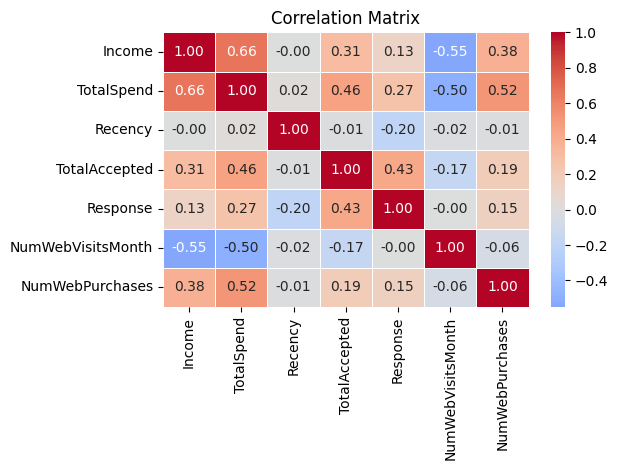

In [101]:
corr = df[['Income','TotalSpend','Recency','TotalAccepted','Response','NumWebVisitsMonth','NumWebPurchases']].corr()

sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",center=0,linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


## *Feature Selection*

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Dropped 
- Identifiers and constants
- Replaced Year birth with Age
- Kidhome and Teenhome with TotalChildren
- AcceptedCmp* with Total Accepted
- Dominant Channel because it was for EDA only

In [104]:
df_new = df.copy()
df_new.drop(columns=['ID','Z_CostContact','Z_Revenue','Year_Birth','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','DominantChannel'], inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2240 non-null   float64       
 3   Dt_Customer          2240 non-null   datetime64[ns]
 4   Recency              2240 non-null   int64         
 5   MntWines             2240 non-null   int64         
 6   MntFruits            2240 non-null   int64         
 7   MntMeatProducts      2240 non-null   int64         
 8   MntFishProducts      2240 non-null   int64         
 9   MntSweetProducts     2240 non-null   int64         
 10  MntGoldProds         2240 non-null   int64         
 11  NumDealsPurchases    2240 non-null   int64         
 12  NumWebPurchases      2240 non-null   int64         
 13  NumCatalogPurchases  2240 non-nul

In [ ]:
df_new = df[['Income','TotalSpend','Recency','CustomerTenure','NumDealsPurchases','NumWebVisitsMonth','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','TotalChildren']]

In [106]:
df_new

,Income,TotalSpend,Recency,CustomerTenure,NumDealsPurchases,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalChildren
0,58138.0,1617,58,13.32,3,7,8,10,4,0
1,46344.0,27,38,11.82,2,5,1,1,2,2
2,71613.0,776,26,12.36,1,4,8,2,10,0
3,26646.0,53,26,11.89,2,6,2,0,4,1
4,58293.0,422,94,11.95,5,5,5,3,6,1
...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,1341,46,12.55,2,5,9,3,4,1
2236,64014.0,444,56,11.56,7,7,8,2,5,3
2237,56981.0,1241,91,11.93,1,6,2,3,13,0
2238,69245.0,843,8,11.93,2,3,6,5,10,1


In [ ]:
df_new.to_csv("./dataset/feature_ready.csv", index=False)

In [ ]:
df.to_csv("./dataset/reduced_columns.csv",index=False)